



Found 216 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Epoch 1/10


6/6 [==============================] - 35s 5s/step - loss: 4096.1807 - accuracy: 0.2717 - val_loss: 3.9752 - val_accuracy: 0.4375
Epoch 2/10
6/6 [==============================] - 29s 5s/step - loss: 4.7761 - accuracy: 0.4837 - val_loss: 5.5496 - val_accuracy: 0.4688
Epoch 3/10
6/6 [==============================] - 30s 5s/step - loss: 5.9747 - accuracy: 0.5761 - val_loss: 6.5084 - val_accuracy: 0.4688
Epoch 4/10
6/6 [==============================] - 30s 5s/step - loss: 6.7552 - accuracy: 0.6685 - val_loss: 7.2365 - val_accuracy: 0.4375
Epoch 5/10
6/6 [==============================] - 29s 5s/step - loss: 7.3140 - accuracy: 0.7120 - val_loss: 7.4620 - val_accuracy: 0.4688
Epoch 6/10
6/6 [==============================] - 29s 5s/step - loss: 7.4329 - accuracy: 0.7011 - val_loss: 7.6741 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 30s 5s/step - loss: 7.5910 - acc

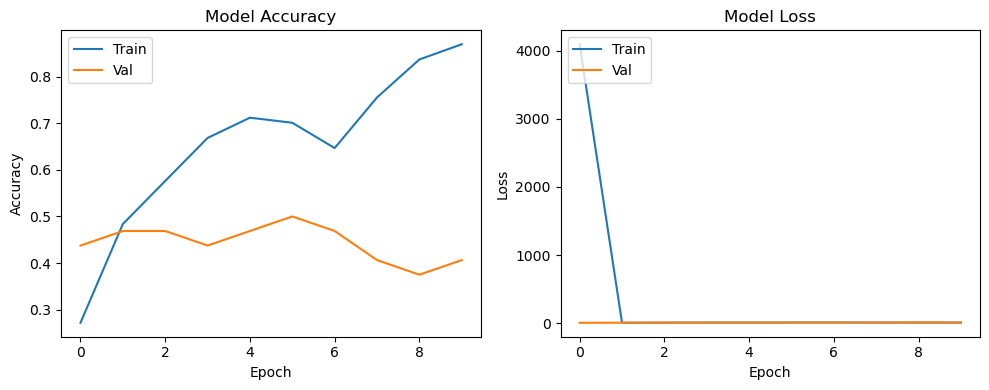

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow.keras.regularizers as regularizers

# Assuming dataset_folder is defined and points to your dataset directory
dataset_folder = 'C:\\Users\\Alexandra\\Documents\\SPRING_2024\\BMEN_689\\Project_2\\Jupyter_Notebook\\512x512_Phage_EMs\\'

# Function to split dataset into train/validation/test
def split_dataset(data_folder, train_size=0.7, val_size=0.15, test_size=0.15):
    for class_folder in os.listdir(data_folder):
        class_path = os.path.join(data_folder, class_folder)
        if os.path.isdir(class_path):
            files = os.listdir(class_path)
            train_files, test_files = train_test_split(files, test_size=val_size+test_size, random_state=42)
            val_files, test_files = train_test_split(test_files, test_size=test_size/(val_size+test_size), random_state=42)

            train_folder = os.path.join(data_folder, 'train', class_folder)
            val_folder = os.path.join(data_folder, 'validation', class_folder)
            test_folder = os.path.join(data_folder, 'test', class_folder)
            for folder in [train_folder, val_folder, test_folder]:
                if not os.path.exists(folder):
                    os.makedirs(folder)

            for file in train_files:
                shutil.copy(os.path.join(class_path, file), os.path.join(train_folder, file))
            for file in val_files:
                shutil.copy(os.path.join(class_path, file), os.path.join(val_folder, file))
            for file in test_files:
                shutil.copy(os.path.join(class_path, file), os.path.join(test_folder, file))

# Call the function to split the dataset
split_dataset(dataset_folder)

input_shape = (512, 512, 3)  # Use 3 channels for RGB images
num_classes = 3

# Reset the model
tf.keras.backend.clear_session()
model = models.Sequential()

# Add layers to the model with L2 regularization for the dense layer
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

# Apply L2 regularization with strength 0.01 to the dense layer
model.add(layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define directory paths for data generators
train_dir = os.path.join(dataset_folder, 'train')
validation_dir = os.path.join(dataset_folder, 'validation')

# Setup data generators
train_datagen = ImageDataGenerator()
validation_datagen = ImageDataGenerator()

batch_size = 32
target_size = (512, 512)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  
    verbose=1  # Set verbose to 1 to see the training progress
)

# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

In [12]:
# Evaluate the model on the test set if you want to see the final performance
test_dir = os.path.join(dataset_folder, 'test')  # Make sure this is the correct path to your test set
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_accuracy)

Found 48 images belonging to 3 classes.
1/1 [==============================] - 1s 1s/step - loss: 8.7312 - accuracy: 0.5000
Test accuracy: 0.5


Found 156 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
Epoch 1/10
4/4 [==============================] - 22s 6s/step - loss: 5695.3760 - accuracy: 0.2742 - val_loss: 247.8674 - val_accuracy: 0.3750
Epoch 2/10
4/4 [==============================] - 22s 5s/step - loss: 101.3228 - accuracy: 0.3226 - val_loss: 4.3136 - val_accuracy: 0.4375
Epoch 3/10
4/4 [==============================] - 22s 6s/step - loss: 4.5934 - accuracy: 0.4688 - val_loss: 5.0739 - val_accuracy: 0.5625
Epoch 4/10
4/4 [==============================] - 22s 5s/step - loss: 5.3214 - accuracy: 0.5806 - val_loss: 7.6509 - val_accuracy: 0.4688
Epoch 5/10
4/4 [==============================] - 22s 6s/step - loss: 6.1009 - accuracy: 0.6406 - val_loss: 6.2353 - val_accuracy: 0.4219
Epoch 6/10
4/4 [==============================] - 22s 6s/step - loss: 6.7699 - accuracy: 0.4677 - val_loss: 6.9023 - val_accuracy: 0.3906
Epoch 7/10
4/4 [==============================] - 21s 6s/step - loss: 6.6692 - accur

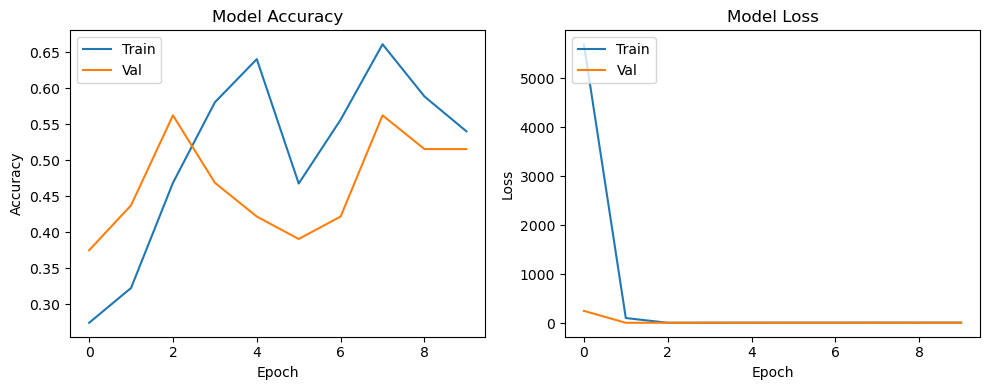

In [16]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow.keras.regularizers as regularizers

# Assuming dataset_folder is defined and points to your dataset directory
dataset_folder = 'C:\\Users\\Alexandra\\Documents\\SPRING_2024\\BMEN_689\\Project_2\\Jupyter_Notebook\\512x512_Phage_EMs\\'

# Function to split dataset into train/validation/test
def split_dataset(data_folder, train_size=0.5, val_size=0.25, test_size=0.25):
    for class_folder in os.listdir(data_folder):
        class_path = os.path.join(data_folder, class_folder)
        if os.path.isdir(class_path):
            files = os.listdir(class_path)
            train_files, test_files = train_test_split(files, test_size=val_size+test_size, random_state=42)
            val_files, test_files = train_test_split(test_files, test_size=test_size/(val_size+test_size), random_state=42)

            train_folder = os.path.join(data_folder, 'train', class_folder)
            val_folder = os.path.join(data_folder, 'validation', class_folder)
            test_folder = os.path.join(data_folder, 'test', class_folder)
            for folder in [train_folder, val_folder, test_folder]:
                if not os.path.exists(folder):
                    os.makedirs(folder)

            for file in train_files:
                shutil.copy(os.path.join(class_path, file), os.path.join(train_folder, file))
            for file in val_files:
                shutil.copy(os.path.join(class_path, file), os.path.join(val_folder, file))
            for file in test_files:
                shutil.copy(os.path.join(class_path, file), os.path.join(test_folder, file))

# Call the function to split the dataset
split_dataset(dataset_folder)

input_shape = (512, 512, 3)  # Use 3 channels for RGB images
num_classes = 3

# Reset the model
tf.keras.backend.clear_session()
model = models.Sequential()

# Add layers to the model with L2 regularization for the dense layer
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

# Apply L2 regularization with strength 0.01 to the dense layer
model.add(layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define directory paths for data generators
train_dir = os.path.join(dataset_folder, 'train')
validation_dir = os.path.join(dataset_folder, 'validation')

# Setup data generators
train_datagen = ImageDataGenerator()
validation_datagen = ImageDataGenerator()

batch_size = 32
target_size = (512, 512)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  
    verbose=1  # Set verbose to 1 to see the training progress
)

# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

In [20]:
# Evaluate the model on the test set if you want to see the final performance
test_dir = os.path.join(dataset_folder, 'test')  # Make sure this is the correct path to your test set
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_accuracy)

Found 78 images belonging to 3 classes.
2/2 [==============================] - 2s 1s/step - loss: 7.3276 - accuracy: 0.3750
Test accuracy: 0.375
